In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [46]:
from matplotlib import rcParams, cycler

pd.set_option('display.max_columns', 500)

#rcParams["figure.figsize"] = 20,7
#rcParams["axes.spines.top"] = False
#rcParams["axes.spines.right"] = False
#rcParams["lines.linewidth"] = 2.5
#rcParams["xtick.labelsize"] = "large"
#rcParams["ytick.labelsize"] = "xx-large"

In [2]:
data = pd.read_csv( "Section_3.csv" )

In [3]:
print(data.shape)
data.head()

(227581, 11)


,Review_Date,Review_Text,User_ID,Business_ID,Business_Name,Business_Category,City,State,Latitude,Longitude,Avg_Business_Star_Rating
0,2014-07-16,okay...so so,6VxJJX7h36bMCCFt7URg6w,9QqLqYIwV-n1BJPjnaYv8A,Beef 'O' Brady's,Bars,Chandler,AZ,33.303847,-111.946838,3.5
1,2014-07-16,Some people complain about the prices but Subw...,viGPiPuMZnV4PR_aiA3-qw,pNQwnY_q4okdlnPiR-3RBA,Empire Bagels,Food,Las Vegas,NV,36.077299,-115.297979,3.5
2,2014-07-16,"Had red curry chicken, the chicken itself was ...",rwehMCinfBjhZ0IbR1zFBw,shCdCHRbnY5FTMJbWl-myQ,Thai Spices,Thai,Mesa,AZ,33.412708,-111.875803,4.0
3,2014-07-16,"Alright, I gave the restaurant manager ample t...",VWqt5IH8fm-k9M0CKFkJzg,HpaYCM_NCauI72LLXxC6SA,Yonaka Modern Japanese,Tapas/Small Plates,Las Vegas,NV,36.114935,-115.209737,4.5
4,2014-07-16,Blehhhh :/ this place shouldn't even be in bus...,Y6-0ToMhjBsm8iYEaT2meg,FC4q3hJyF8oo984xoo3RMg,808 Sushi,Sushi Bars,Las Vegas,NV,36.052181,-115.279227,3.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227581 entries, 0 to 227580
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Review_Date               227581 non-null  object 
 1   Review_Text               227580 non-null  object 
 2   User_ID                   227581 non-null  object 
 3   Business_ID               227581 non-null  object 
 4   Business_Name             227581 non-null  object 
 5   Business_Category         227297 non-null  object 
 6   City                      227581 non-null  object 
 7   State                     227581 non-null  object 
 8   Latitude                  227581 non-null  float64
 9   Longitude                 227581 non-null  float64
 10  Avg_Business_Star_Rating  227581 non-null  float64
dtypes: float64(3), object(8)
memory usage: 19.1+ MB


## 1) How many unique restaurants could be found in this data set?

In [5]:
# show number of unique restaurants
len( data["Business_ID"].unique() )

30276

## 2) Which restaurant received highest number of reviews? What about percentage-wise?


In [6]:
rest_group = data.groupby( "Business_ID" )
rating_counts = rest_group["Avg_Business_Star_Rating"].count()

# show highes number of reviews
print( rating_counts[  np.argmax( rating_counts ):np.argmax( rating_counts )+1   ]  )

Business_ID
4bEjOyTaDG24SY5TxsaUNQ    856
Name: Avg_Business_Star_Rating, dtype: int64


In [7]:
# percentage-wise
(rating_counts.max() / rating_counts.sum()) * 100

0.37612981751552194

## 3) Which cities have got at least one 5 star review in Nevada (NV) state?

In [8]:
nevada = data[ data["State"] == "NV" ]
nevada.shape

(116834, 11)

In [9]:
nevada_city_gr = nevada.groupby( "City" )
has_any = nevada_city_gr.filter( lambda x : (x["Avg_Business_Star_Rating"] == 5).any() )
# show cities that have got at least one 5 star review in Nevada (NV) state
has_any["City"].unique()

array(['Las Vegas', 'Henderson', 'Nellis', 'Boulder City'], dtype=object)

## 4) Which city has got the highest number of reviews in the Business Category of “Hotels & Travel”? What about percentage-wise?

In [10]:
hotels_travels = data[  data["Business_Category"]== "Hotels & Travel" ] 

In [11]:
city_gr = hotels_travels.groupby( "City" )
rev_counts = city_gr.size()
# show city that has got the highest number of reviews in the Business Category of “Hotels & Travel”
rev_counts[  np.argmax( rev_counts ):np.argmax( rev_counts )+1   ]

City
Las Vegas    10245
dtype: int64

In [12]:
# percentage-wise
(rev_counts.max() / rev_counts.sum()) * 100

77.64304660856385

## 5) At what day of the week people are more likely to post their reviews?

In [13]:
cpy_data = data.copy()
cpy_data["Review_Date"] = pd.to_datetime( data["Review_Date"] )
cpy_data["week_day"] = cpy_data["Review_Date"].dt.weekday

In [14]:
# show count of posts at particular day
cpy_data["week_day"].value_counts()

0    36446
1    34262
2    34170
6    32889
3    30669
4    29574
5    29571
Name: week_day, dtype: int64

## 6) Showcase if there are any trends regarding restaurant performance as time goes by.

In [15]:
cpy_data["month"] = cpy_data["Review_Date"].dt.month
cpy_data["year"] = cpy_data["Review_Date"].dt.year

In [16]:
cpy_data.head()

,Review_Date,Review_Text,User_ID,Business_ID,Business_Name,Business_Category,City,State,Latitude,Longitude,Avg_Business_Star_Rating,week_day,month,year
0,2014-07-16,okay...so so,6VxJJX7h36bMCCFt7URg6w,9QqLqYIwV-n1BJPjnaYv8A,Beef 'O' Brady's,Bars,Chandler,AZ,33.303847,-111.946838,3.5,2,7,2014
1,2014-07-16,Some people complain about the prices but Subw...,viGPiPuMZnV4PR_aiA3-qw,pNQwnY_q4okdlnPiR-3RBA,Empire Bagels,Food,Las Vegas,NV,36.077299,-115.297979,3.5,2,7,2014
2,2014-07-16,"Had red curry chicken, the chicken itself was ...",rwehMCinfBjhZ0IbR1zFBw,shCdCHRbnY5FTMJbWl-myQ,Thai Spices,Thai,Mesa,AZ,33.412708,-111.875803,4.0,2,7,2014
3,2014-07-16,"Alright, I gave the restaurant manager ample t...",VWqt5IH8fm-k9M0CKFkJzg,HpaYCM_NCauI72LLXxC6SA,Yonaka Modern Japanese,Tapas/Small Plates,Las Vegas,NV,36.114935,-115.209737,4.5,2,7,2014
4,2014-07-16,Blehhhh :/ this place shouldn't even be in bus...,Y6-0ToMhjBsm8iYEaT2meg,FC4q3hJyF8oo984xoo3RMg,808 Sushi,Sushi Bars,Las Vegas,NV,36.052181,-115.279227,3.5,2,7,2014


In [17]:
bus_df =  cpy_data[["Business_ID","year","month"  ]]
rest_group_date = cpy_data.groupby( ["Business_ID","year","month"  ] )

In [18]:
agg_rest = rest_group_date.size()
best_rev_bus = agg_rest.groupby(level=0).apply( lambda x : x.pct_change().sum() )

In [19]:
# showing Business_ID s that has highest rate of percentage change over month
best_rev_bus.sort_values(ascending=False)

Business_ID
eWPFXL1Bmu1ImtIa2Rqliw    44.486544
hW0Ne_HTHEAgGF1rAdmR-g    40.993651
SsTxjxo8qvqBMvan1rzNzg    34.896429
DUdBbrvqfaqUe9GYKmYNtA    34.736905
u9wjRhUjySkHPa_hG3kFOg    33.690354
                            ...    
fUrErf3orbQN26ocjCgvlA    -1.100000
zYRKOiYCZJAg1SV1WZG4lw    -1.100000
4KwEzJyeuHqna7_A_eeI3g    -1.288889
NlQ-w91Kt58nvyULncE9kA    -1.300000
viVNUK88__6GAlov3cx13g    -1.333333
Length: 30276, dtype: float64

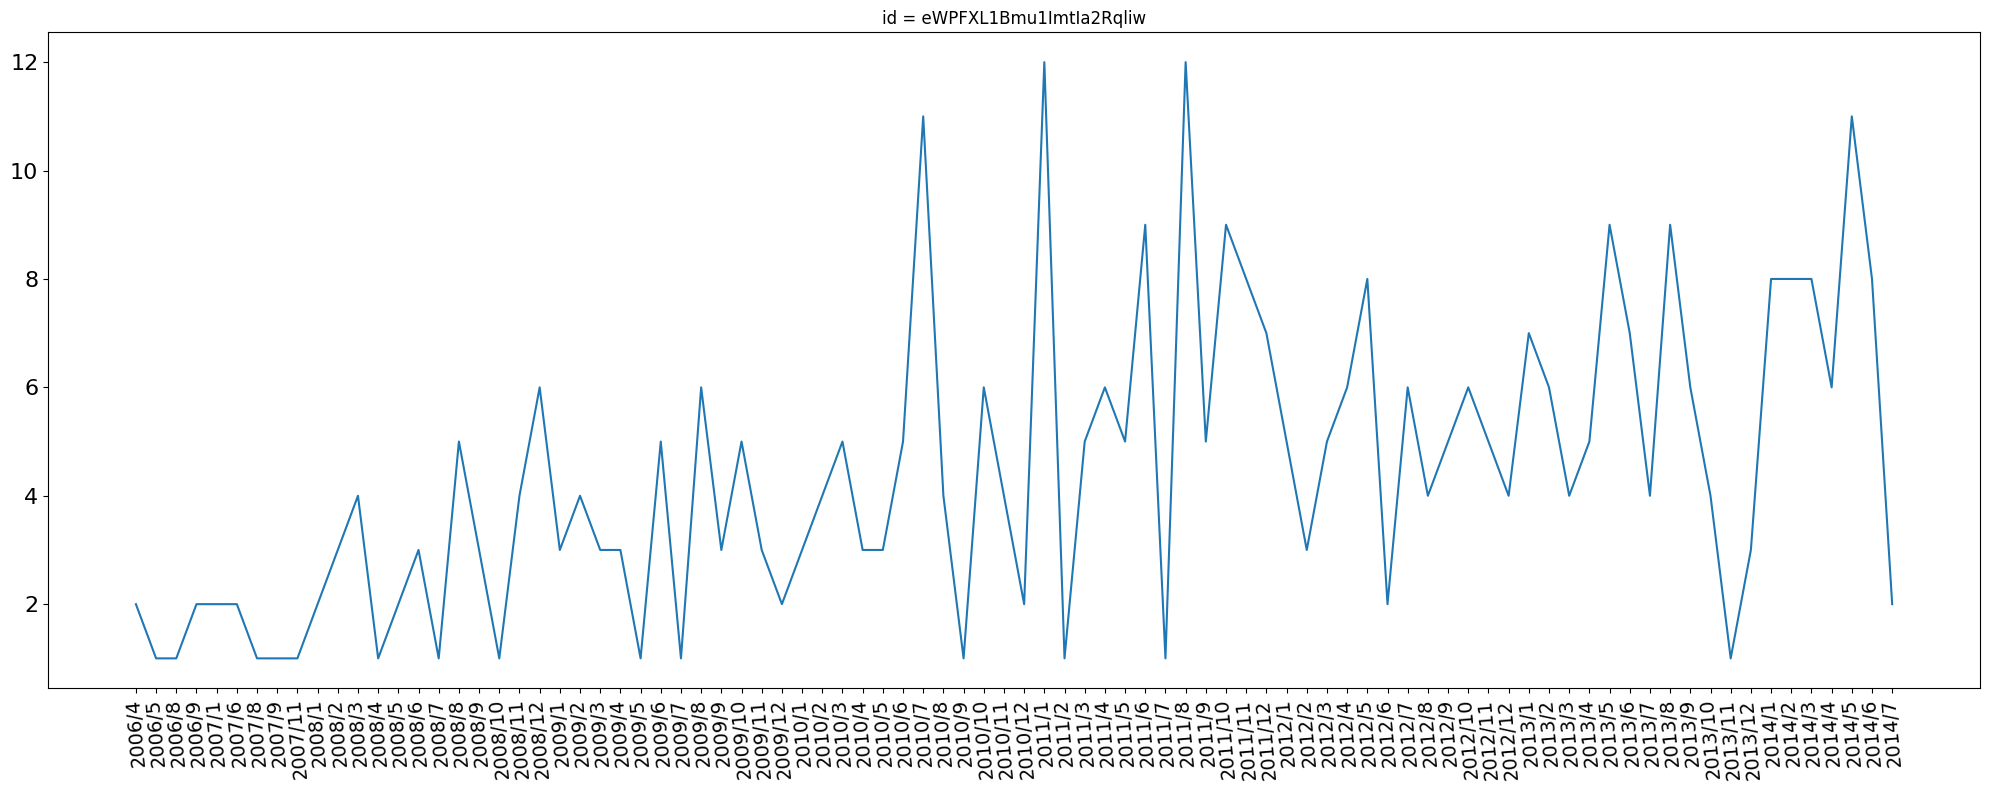

In [31]:
fig, ax = plt.subplots( figsize = (20,8) )

bus = agg_rest.groupby(level=0).get_group("eWPFXL1Bmu1ImtIa2Rqliw")
dates = [ str( i[1] ) + "/" + str( i[2] ) for i in bus.index ]
ax.plot( dates , bus.values )

plt.xticks(rotation=95)
plt.xticks( fontsize = 14 )
plt.yticks( fontsize = 16 )
plt.title( "id = eWPFXL1Bmu1ImtIa2Rqliw" )
plt.tight_layout()
plt.show()

## 7) Based on analyzed data showcase if there any steps that restaurant can take in order to improve their public appeal.

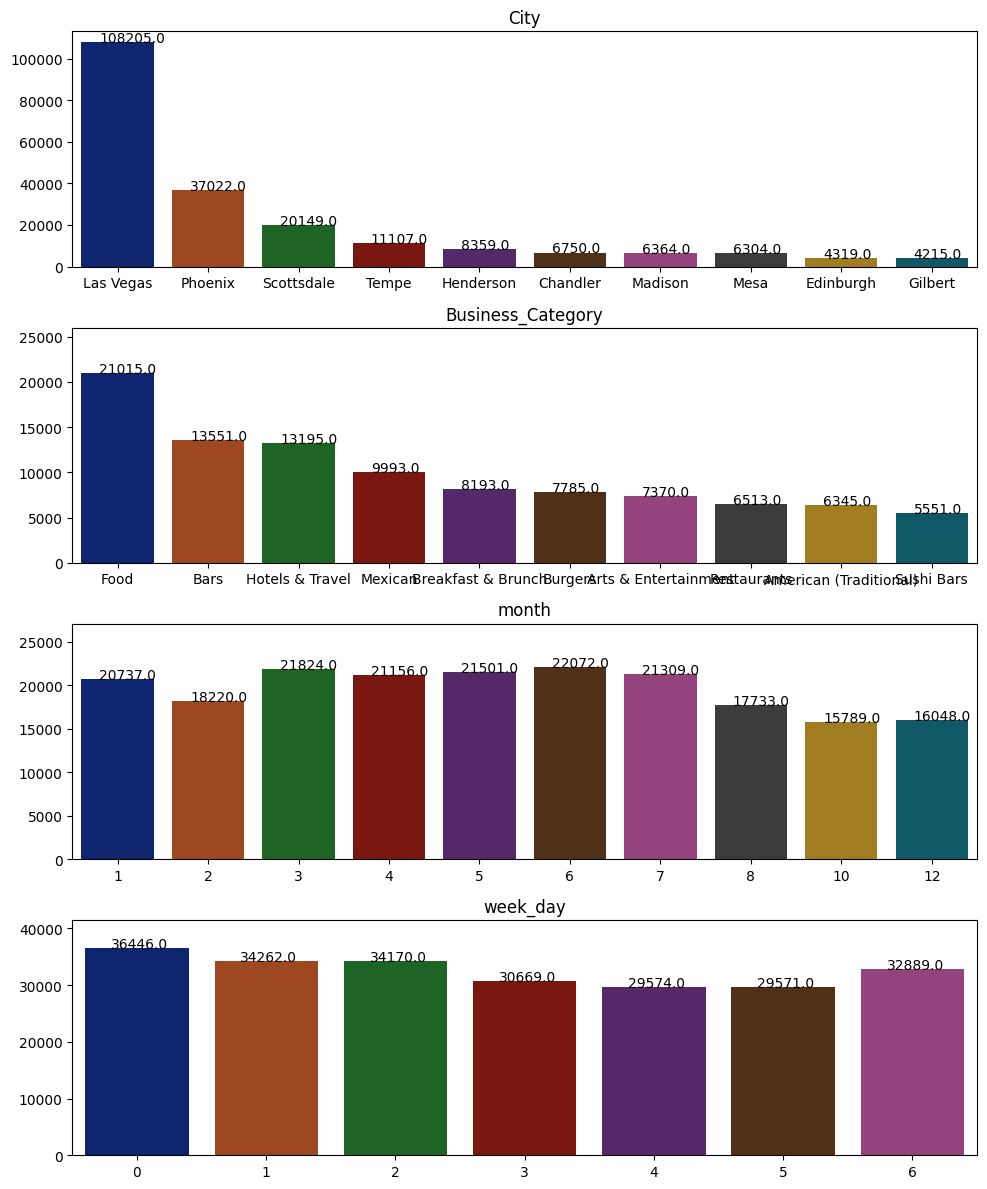

In [138]:

cats = [ "City", "Business_Category", "month","week_day" ]
fig, ax = plt.subplots( nrows = len(cats) , ncols=1, figsize = (10,12) )

for i,cat in enumerate(cats):
    var_count = cpy_data[ cat ].value_counts()[:10]
    sns.barplot(x=var_count.index , y = var_count.values , palette="dark", ax=ax[i] )
    
    bars = ax[i].patches
    max_h = 0
    for bar in bars:
        h = bar.get_height()
        w = bar.get_width()
        x = bar.get_x()
        if h>max_h:
            max_h=h
        ax[i].text( x + (w/4) , h+5, f"{h}" )
    
    ax[i].set_title( cat )
    ax[i].set_ylim(0, max_h+5000 )
    
plt.tight_layout()
plt.show()

1) We can see that in Las Vegas there are much more reviews than in others.<br>
2) It also looks like that when "Business_Category" is "Food" it can lead to improvement of their public appeal.<br>
These may be a key. For instance build restaurant in Las Vegas with "Business_Category" of "Food". 

## 8) Based on this data-set which user had the highest cumulative travel distance? What distance has been covered by him/her?

In [47]:
user_gr = cpy_data.sort_values( "Review_Date" ).groupby( "User_ID" )

In [98]:
def dist(x):
    R = 6373.0
    lat1 = np.radians( x["Latitude"].values[1:] ) 
    lon1 = np.radians( x["Longitude"].values[1:] )
    lat2 = np.radians( x["Latitude"].values[:-1] ) 
    lon2 = np.radians( x["Longitude"].values[:-1] )

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin( dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2( np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return ( np.sum(distance))
    
    
user_miles = user_gr.apply( dist )

In [99]:
# show users sorted by travel distance( in km )
user_miles.sort_values(ascending=False)

User_ID
6uYJ-ixRxPMyf-iEbhoz2g    31782.007252
WFpoTnMacPMtSmQTmJjp_Q    23835.282153
kGgAARL2UmvCcTRfiscjug    22002.392523
68Ci9UgVIVEiCGXy05loLw    19015.413249
czsmQRXhXy-S40cKpEk0Lg    17164.563268
                              ...     
aDVtv96VmFn3w2ltkFIkyw        0.000000
aD_Er44NKDGy-hJMw94LRw        0.000000
aDf71ZaFo44v24WiMHDrAQ        0.000000
aDhaSTo9TYwOo4UFPvTuEg        0.000000
--2QZsyXGz1OhiD4-0FQLQ        0.000000
Length: 100705, dtype: float64